In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
 
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

import os
os.chdir("E:\kaggle dataset\customer_churn")
import warnings
warnings.filterwarnings(action='ignore')


In [86]:
df=pd.read_csv("customer_churn_tele.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
df["customerID"].nunique()
#No repeated customers, hence remove it

7043

In [4]:
print("No. of Rows",df.shape[0])
print("No of Columns",df.shape[1])

No. of Rows 7043
No of Columns 21


In [5]:
df["Churn"].value_counts()/len(df)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [6]:
#finding the missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Basic information about the data
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


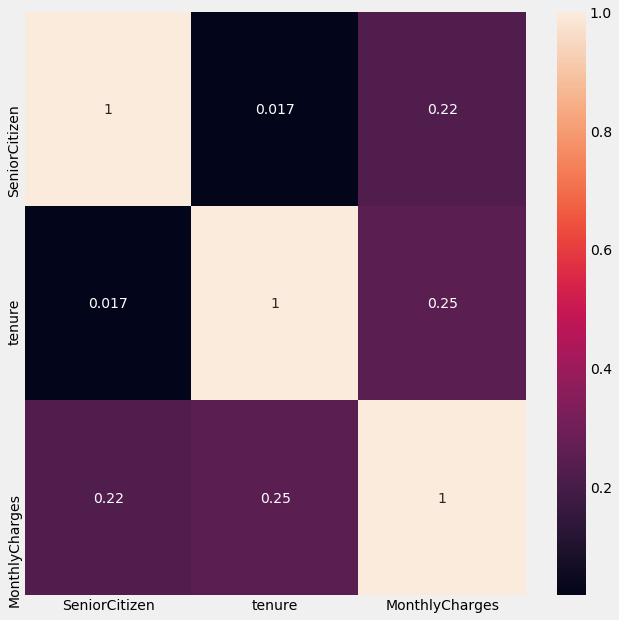

In [93]:
#Finding correlation between the variables.
plt.rcParams["figure.figsize"] = 10,10
sns.heatmap(df.corr(),annot=True);

In [9]:
#splitting the categorical and numerical values.
num_col=[]
for i in df.columns:
    if df[i].dtype != "object":
        num_col.append(i)

In [10]:
df_num=df[num_col]

In [11]:
cat_col=[k for k in df.columns if df[k].dtype == "object"]

In [12]:
df_cat=df[cat_col]

In [13]:
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [14]:
df_cat=df_cat.drop("Churn",axis=1)

In [15]:
df_res=df["Churn"]

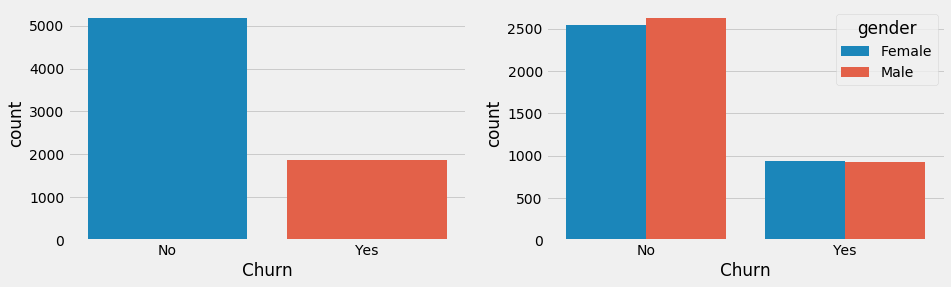

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.countplot(x="Churn", data=df, ax=ax1)
sns.countplot(x="Churn", data=df, hue="gender", ax=ax2)

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


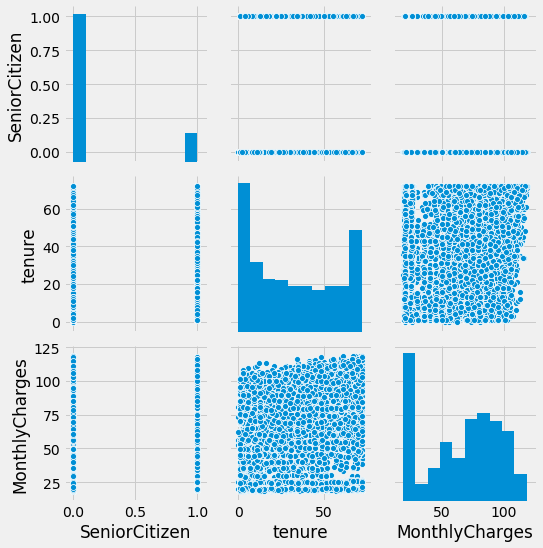

In [18]:
plt.rcParams["figure.figsize"] = 20,20
sns.pairplot(df)

In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D27ECDC08>,
      dtype=object)

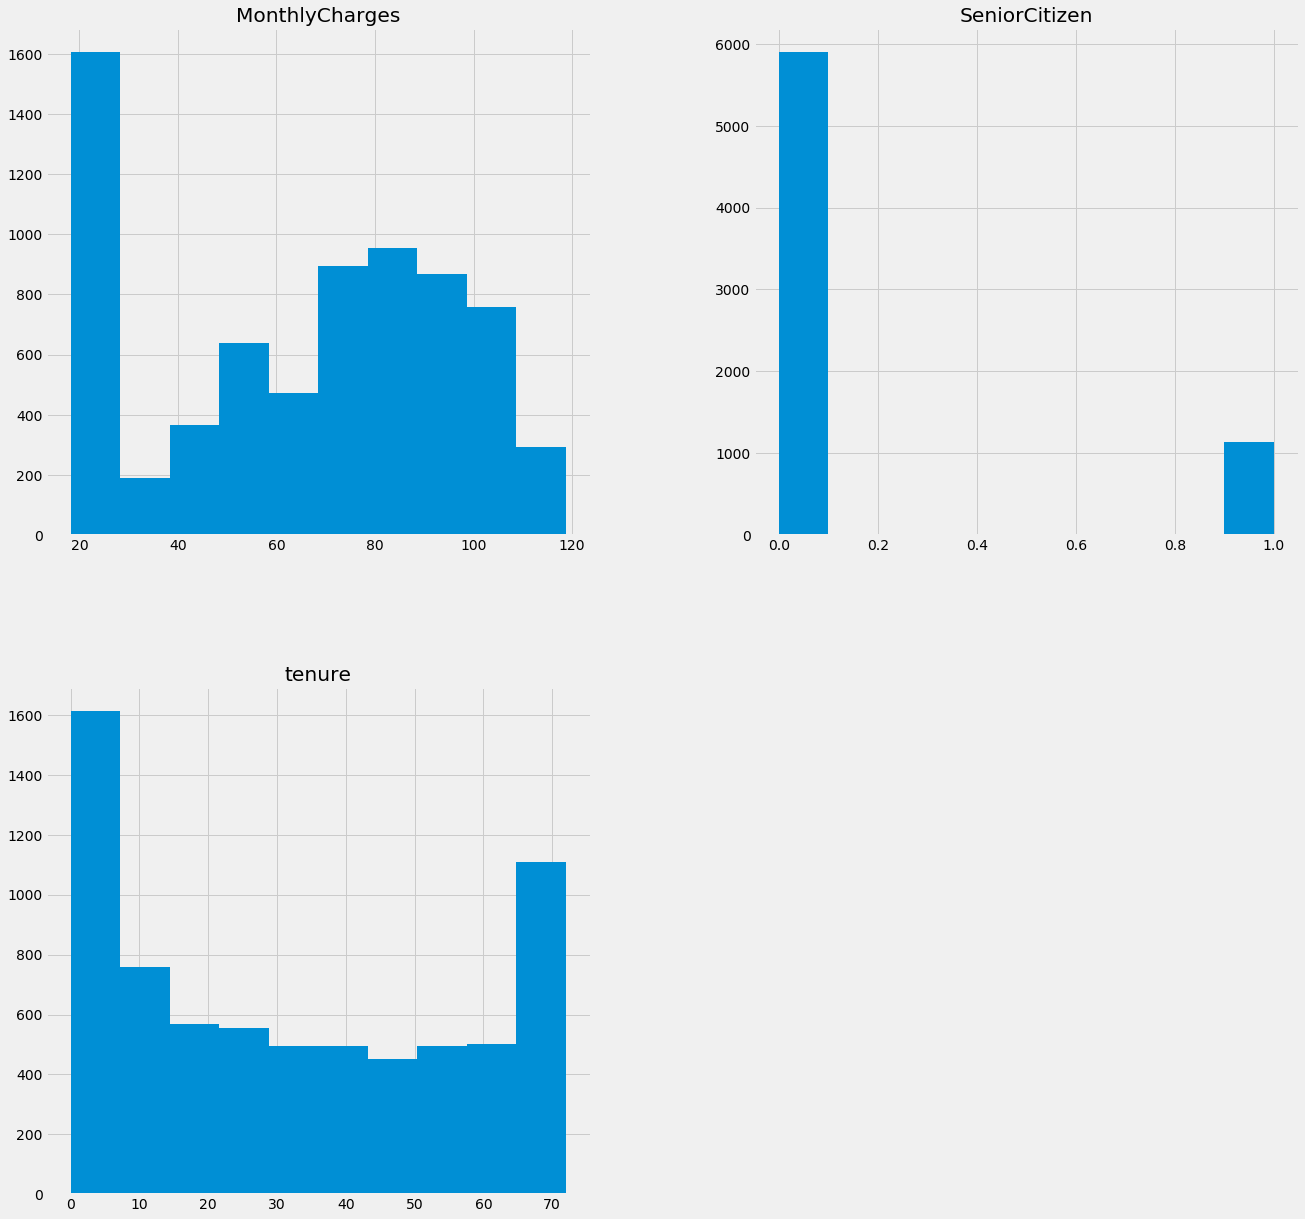

In [20]:
df.hist()

As we can see over here is the distribution of the 

In [21]:
# plt.figure(figsize=(5,5))
# sns.scatterplot(x = "MonthlyCharges", y = "TotalCharges",hue = "Churn", data = df);

There is no relationship between tenure and MonthlyCharges and here I included Churn for the better understanding of the data.

# Preprocessing 


#### Categorical Data

In [22]:
df_cat.head(5)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65


In [23]:
df_cat=df_cat.drop("customerID",axis=1)

In [24]:
df_cat["TotalCharges"] = df_cat["TotalCharges"].replace(" ", 20.2)

In [25]:
df_cat["TotalCharges"] = pd.to_numeric(df_cat["TotalCharges"], errors="ignore")

In [26]:
df_num["TotalCharges"] = df_cat["TotalCharges"].copy()
del df_cat["TotalCharges"]

In [27]:
df_cat.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check


In [28]:
df_cat["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [29]:
for i in df_cat.columns:
    val=df_cat[i].value_counts()
    print(val)
    print("   ======== ")
    print("")        

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: S

In [30]:
ordinal_feature=["InternetService"]

In [31]:
df_cat["InternetService"].value_counts().index

Index(['Fiber optic', 'DSL', 'No'], dtype='object')

In [32]:
Is_map={"Fiber optic":2,"DSL":1,"No":0}
df_cat["InternetService"]=df_cat["InternetService"].map(Is_map)

In [33]:
df_cat["InternetService"].head()

0    1
1    1
2    1
3    1
4    2
Name: InternetService, dtype: int64

In [34]:
cat_dummies=pd.get_dummies(df_cat,drop_first=True)

In [35]:
cat_dummies.head(4)

,InternetService,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [36]:
cat_dummies.shape

(7043, 25)

#### Numerical Data

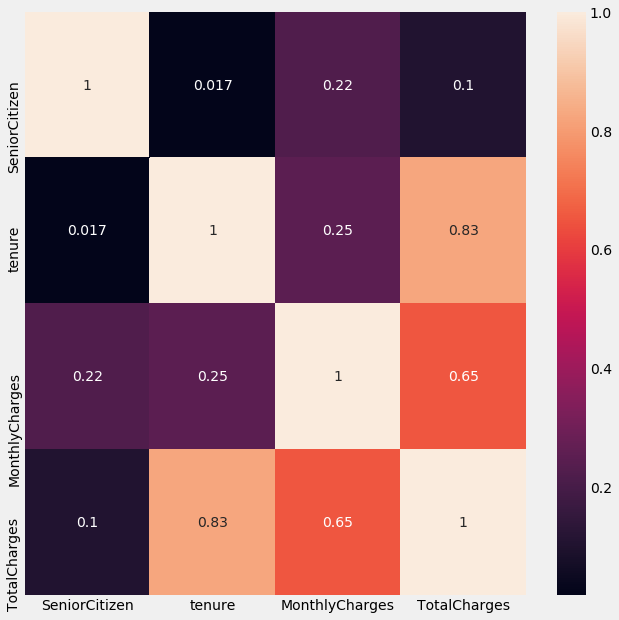

In [94]:
#finding correlation for all the variables.
sns.heatmap(df_num.corr(),annot=True);

More than two variables are heavily correlated which is 
*TotalCharges and MonthlyCharges
*TotalCharges and tenure
*tenure and MonthlyCharges 


In [37]:
df_num.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15


In [38]:
#concateneting the Categorical and Numerical data

In [39]:
full_data=pd.concat([cat_dummies,df_num],axis=1)

In [40]:
full_data.head(5)

,InternetService,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,29.85,29.85
1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,34,56.95,1889.50
2,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,53.85,108.15
3,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,45,42.30,1840.75
4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,70.70,151.65


In [41]:
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()
std_arr=std_scl.fit_transform(full_data)
full_data=pd.DataFrame(std_arr,columns=full_data.columns)

In [42]:
full_data.head()

,InternetService,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.286223,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,-0.439916,-1.277445,-1.160323,-0.992638
1,-0.286223,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513,-0.439916,0.066327,-0.259629,-0.172181
2,-0.286223,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513,-0.439916,-1.236724,-0.362660,-0.958093
3,-0.286223,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807,-0.439916,0.514251,-0.746535,-0.193689
4,0.997769,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,-0.439916,-1.236724,0.197365,-0.938901


# Model Building

In [43]:
type(df_res)

pandas.core.series.Series

In [44]:
res_enc={"Yes":1,"No":0}
df_res=df_res.map(res_enc)

In [45]:
#train test split
X=full_data
Y=df_res
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30, random_state=2020)


#splitting the train and test data with 70:30 respectively.

Since it is imbalanced data, comparing tree based models.

### Random Forest Baseline

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report,precision_score, recall_score


ran_clas=RandomForestClassifier()
ran_clas.fit(X_train,y_train)
pred_train=ran_clas.predict(X_train)
print("Train_Classification Report:\n",classification_report(y_train,pred_train))
pred_test=ran_clas.predict(X_test)
print("Test_Classification Report:\n",classification_report(y_test,pred_test))
print("="*60)
print("Test_Precision: ",precision_score(y_test,pred_test))
print("Test_Recall: ",recall_score(y_test,pred_test))
print("Test_F1_Score: ",f1_score(y_test,pred_test))

Train_Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      1336

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930

Test_Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.63      0.49      0.55       533

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113

Test_Precision:  0.6328502415458938
Test_Recall:  0.4915572232645403
Test_F1_Score:  0.5533262935586061


### XGboost Baseline

In [106]:
from xgboost import XGBClassifier
xg_class=XGBClassifier()

xg_class.fit(X_train,y_train)
pred_train=xg_class.predict(X_train)
print("Train_Classification Report:\n",classification_report(y_train,pred_train))
pred_test=xg_class.predict(X_test)
print("Test_Classification Report:\n",classification_report(y_test,pred_test))
print("="*60)
print("Test_Precision: ",precision_score(y_test,pred_test))
print("Test_Recall: ",recall_score(y_test,pred_test))
print("Test_F1_Score: ",f1_score(y_test,pred_test))

Train_Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      3594
           1       0.93      0.87      0.90      1336

    accuracy                           0.95      4930
   macro avg       0.94      0.92      0.93      4930
weighted avg       0.95      0.95      0.95      4930

Test_Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1580
           1       0.60      0.49      0.54       533

    accuracy                           0.79      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113

Test_Precision:  0.5950226244343891
Test_Recall:  0.49343339587242024
Test_F1_Score:  0.5394871794871794


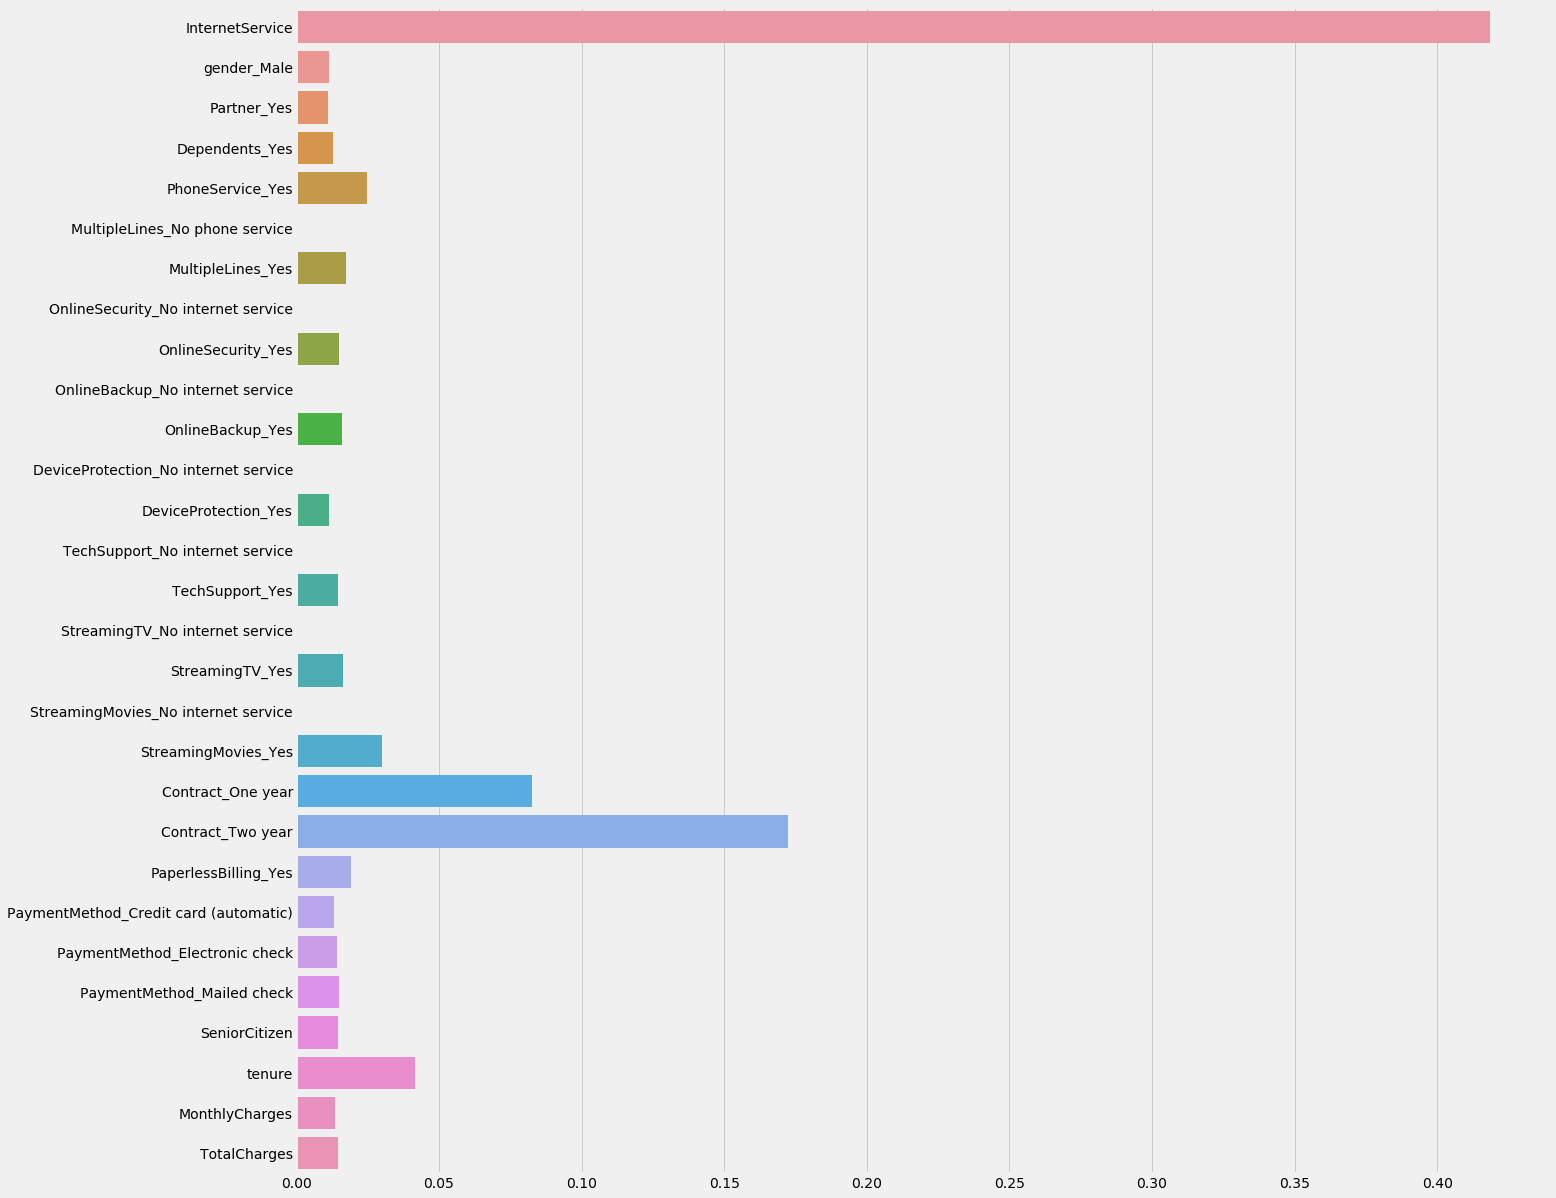

In [107]:
plt.figure(figsize=(20,20))
sns.barplot(xg_class.feature_importances_, X.columns);

In [48]:
from lightgbm import LGBMClassifier
LGBM_class=LGBMClassifier()

LGBM_class.fit(X_train,y_train)
pred_train=LGBM_class.predict(X_train)
print("Train_Classification Report:\n",classification_report(y_train,pred_train))
pred_test=LGBM_class.predict(X_test)
print("Test_Classification Report:\n",classification_report(y_test,pred_test))
print("="*60)
print("Test_Precision: ",precision_score(y_test,pred_test))
print("Test_Recall: ",recall_score(y_test,pred_test))
print("Test_F1_Score: ",f1_score(y_test,pred_test))

Train_Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      3594
           1       0.82      0.72      0.77      1336

    accuracy                           0.88      4930
   macro avg       0.86      0.83      0.84      4930
weighted avg       0.88      0.88      0.88      4930

Test_Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.63      0.51      0.56       533

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Test_Precision:  0.6261467889908257
Test_Recall:  0.5121951219512195
Test_F1_Score:  0.563467492260062


In [49]:
from catboost import CatBoostClassifier
Cat_class=CatBoostClassifier(logging_level="Silent")

Cat_class.fit(X_train,y_train)
pred_train=Cat_class.predict(X_train)
print("Train_Classification Report:\n",classification_report(y_train,pred_train))
pred_test=Cat_class.predict(X_test)
print("Test_Classification Report:\n",classification_report(y_test,pred_test))
print("="*60)
print("Test_Precision: ",precision_score(y_test,pred_test))
print("Test_Recall: ",recall_score(y_test,pred_test))
print("Test_F1_Score: ",f1_score(y_test,pred_test))

Train_Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      3594
           1       0.82      0.68      0.74      1336

    accuracy                           0.87      4930
   macro avg       0.85      0.81      0.83      4930
weighted avg       0.87      0.87      0.87      4930

Test_Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.64      0.50      0.56       533

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Test_Precision:  0.639618138424821
Test_Recall:  0.5028142589118199
Test_F1_Score:  0.5630252100840335


In [50]:
from sklearn.linear_model import LogisticRegression
Log_reg=LogisticRegression(class_weight={0:0.4,1:0.6})

Log_reg.fit(X_train,y_train)
pred_train=Log_reg.predict(X_train)
print("Train_Classification Report:\n",classification_report(y_train,pred_train))
pred_test=Log_reg.predict(X_test)
print("Test_Classification Report:\n",classification_report(y_test,pred_test))
print("="*60)
print("Test_Precision: ",precision_score(y_test,pred_test))
print("Test_Recall: ",recall_score(y_test,pred_test))
print("Test_F1_Score: ",f1_score(y_test,pred_test))

Train_Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      3594
           1       0.59      0.68      0.63      1336

    accuracy                           0.78      4930
   macro avg       0.73      0.75      0.74      4930
weighted avg       0.80      0.78      0.79      4930

Test_Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      1580
           1       0.58      0.67      0.62       533

    accuracy                           0.79      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.81      0.79      0.80      2113

Test_Precision:  0.5776699029126213
Test_Recall:  0.6697936210131332
Test_F1_Score:  0.6203301476976542


In [51]:
f1_score(y_train,pred_train) 

0.6297457331940091

# Hyperparameter Optimization

In [54]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"],
          "penalty":["l1","l2"],
          "fit_intercept":[True,False]}

log_reg = LogisticRegression()

grid_search_cv = GridSearchCV(log_reg, params, scoring="f1", n_jobs=-1, verbose=1, cv=5, iid=True)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.1min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), iid=True, n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1', verbose=1)

In [55]:
grid_search_cv.best_estimator_

LogisticRegression(C=0.0018329807108324356, solver='liblinear')

In [56]:
from sklearn.linear_model import LogisticRegression
Log_reg=LogisticRegression(C=0.0018329807108324356, solver='liblinear',class_weight={0:0.4,1:0.6})

Log_reg.fit(X_train,y_train)
pred_train=Log_reg.predict(X_train)
print("Train_Classification Report:\n",classification_report(y_train,pred_train))
pred_test=Log_reg.predict(X_test)
print("Test_Classification Report:\n",classification_report(y_test,pred_test))
print("="*60)
print("Test_Precision: ",precision_score(y_test,pred_test))
print("Test_Recall: ",recall_score(y_test,pred_test))
print("Test_F1_Score: ",f1_score(y_test,pred_test))

Train_Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      3594
           1       0.53      0.76      0.62      1336

    accuracy                           0.75      4930
   macro avg       0.71      0.75      0.72      4930
weighted avg       0.80      0.75      0.76      4930

Test_Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.82      1580
           1       0.52      0.77      0.62       533

    accuracy                           0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.81      0.76      0.77      2113

Test_Precision:  0.5157629255989912
Test_Recall:  0.7673545966228893
Test_F1_Score:  0.6168929110105581


# Tuning XGBOOST

In [88]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators, 'max_depth': max_depth,
                       'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
                       'booster' : booster, 'base_score' : base_score
                      }

xgb_model = XGBClassifier()

xgb_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid,
                               cv=3, n_iter=650, scoring = 'f1',n_jobs =-1, iid=True,
                               verbose=1, return_train_score = True, random_state=2020)


xgb_cv.fit(X_train, y_train)

xgb_cv.best_estimator_

Fitting 3 folds for each of 650 candidates, totalling 1950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 62.4min
[Parallel(n_jobs=-1)]: Done 1950 out of 1950 | elapsed: 66.8min finished


[22:16:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.25, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=3,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=1,
              verbosity=None)

In [98]:
from xgboost import XGBClassifier
xg_class=XGBClassifier(base_score=0.25, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=3,
              min_child_weight=4, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=1,
              verbosity=None)

xg_class.fit(X_train,y_train)
pred_train=xg_class.predict(X_train)
print("Train_Classification Report:\n",classification_report(y_train,pred_train))
pred_test=xg_class.predict(X_test)
print("Test_Classification Report:\n",classification_report(y_test,pred_test))
print("="*60)
print("Test_Precision: ",precision_score(y_test,pred_test))
print("Test_Recall: ",recall_score(y_test,pred_test))
print("Test_F1_Score: ",f1_score(y_test,pred_test))

[22:58:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train_Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      3594
           1       0.66      0.57      0.61      1336

    accuracy                           0.80      4930
   macro avg       0.75      0.73      0.74      4930
weighted avg       0.80      0.80      0.80      4930

Test_Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1580
           1       0.65      0.57      0.61       533

    accuracy                           0.81  

# SMOTE OVERSAMPLING

In [58]:
y_train.value_counts()

0    3594
1    1336
Name: Churn, dtype: int64

In [76]:
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(0.75)
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))


The number of classes before fit Counter({0: 3594, 1: 1336})
The number of classes after fit Counter({0: 3353, 1: 2454})


In [72]:
from xgboost import XGBClassifier
xg_class=XGBClassifier()

xg_class.fit(X_train_os,y_train_os)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
pred_train=xg_class.predict(X_train)
print("Train_Classification Report:\n",classification_report(y_train,pred_train))
pred_test=xg_class.predict(X_test)
print("Test_Classification Report:\n",classification_report(y_test,pred_test))
print("="*60)
print("Test_Precision: ",precision_score(y_test,pred_test))
print("Test_Recall: ",recall_score(y_test,pred_test))
print("Test_F1_Score: ",f1_score(y_test,pred_test))

Train_Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      3594
           1       0.84      0.88      0.86      1336

    accuracy                           0.92      4930
   macro avg       0.90      0.91      0.90      4930
weighted avg       0.92      0.92      0.92      4930

Test_Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1580
           1       0.58      0.57      0.57       533

    accuracy                           0.79      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.79      0.79      0.79      2113

Test_Precision:  0.581573896353167
Test_Recall:  0.5684803001876173
Test_F1_Score:  0.5749525616698292


In [82]:
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(0.75)
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 3594, 1: 1336})
The number of classes after fit Counter({0: 3365, 1: 2466})


In [83]:
from sklearn.linear_model import LogisticRegression
Log_reg=LogisticRegression(C=0.0018329807108324356, solver='liblinear')
Log_reg.fit(X_train,y_train)

LogisticRegression(C=0.0018329807108324356, solver='liblinear')

In [84]:
pred_train=Log_reg.predict(X_train)
print("Train_Classification Report:\n",classification_report(y_train,pred_train))
pred_test=Log_reg.predict(X_test)
print("Test_Classification Report:\n",classification_report(y_test,pred_test))
print("="*60)
print("Test_Precision: ",precision_score(y_test,pred_test))
print("Test_Recall: ",recall_score(y_test,pred_test))
print("Test_F1_Score: ",f1_score(y_test,pred_test))

Train_Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      3594
           1       0.62      0.65      0.63      1336

    accuracy                           0.79      4930
   macro avg       0.74      0.75      0.74      4930
weighted avg       0.80      0.79      0.80      4930

Test_Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1580
           1       0.60      0.62      0.61       533

    accuracy                           0.80      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.80      0.80      0.80      2113

Test_Precision:  0.6025408348457351
Test_Recall:  0.6228893058161351
Test_F1_Score:  0.6125461254612546


# Thanks for reading this notebook